### this notebook will filter out individuals with MCI in the ADNI dataset based on the length of their follow up

In [1]:
import pandas as pd
import numpy as np

In [146]:
longit = pd.read_csv('/Users/AngelaTam/Desktop/adsf/adni_csv/adnimerge_upenn_unw_av45_neurobat.csv')

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
adni1 = pd.read_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni1_model_weights.csv')
adni2 = pd.read_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni2_model_weights.csv')

In [148]:
# in adni2 drop people who rolled over from adni1
adni2.drop(adni2[adni2.RID < 2000].index,inplace=True)

In [149]:
# get adni1 subjects longitudinal data
adni1_longit = longit.drop(longit[longit.RID>=2000].index)

In [150]:
# get adni2 subjects longitudinal data
adni2_longit = longit.drop(longit[longit.RID<2000].index)
adni2_longit.drop(adni2_longit[adni2_longit.RID>=6000].index, inplace=True)

In [151]:
list_df = [longit, adni1, adni2, adni1_longit, adni2_longit]
for df in list_df:
    df.set_index('RID',inplace=True)

In [152]:
# get rid of subjects who don't pass QC
adni1.dropna(axis=0, how='any', subset=['sub1','mean_gm','gender'], inplace=True)
adni2.dropna(axis=0, how='any', subset=['sub1','mean_gm','gender'], inplace=True)

# ADNI1 

In [153]:
# number of subjects that passed QC in adni1
len(adni1.index.unique())

722

In [154]:
# number of MCI subjects that passed QC in adni1
len(adni1[(adni1['DX_bl'] == 'EMCI') | (adni1['DX_bl'] == 'LMCI')].index.unique())

348

In [155]:
# number of AD subjects that passed QC in adni1
len(adni1[adni1['DX_bl'] == 'AD'].index.unique())

169

In [156]:
# number of CN subjects that passed QC in adni1
len(adni1[adni1['DX_bl'] == 'CN'].index.unique())

205

In [157]:
# number of MCI subjects that convert
len(adni1[(adni1['conv_2_ad']==1) & ((adni1['DX_bl'] == 'EMCI') | (adni1['DX_bl'] == 'LMCI'))].index.unique())

194

In [158]:
# number of MCI subjects that are stable
len(adni1[(adni1['conv_2_ad']==0) & ((adni1['DX_bl'] == 'EMCI') | (adni1['DX_bl'] == 'LMCI'))].index.unique())

154

## filter out the stable MCI without enough follow-up 

In [159]:
adni1_mci = adni1_longit[(adni1_longit['DX_bl'] == 'EMCI') | (adni1_longit['DX_bl'] == 'LMCI')]

In [161]:
todrop = []
for sub in adni1_mci[adni1_mci['conv_2_ad']==0].index.unique():
    fu = adni1_mci.loc[sub]
    try:
        vis = list(fu['Years_bl'])
    except:
        vis = [fu['Years_bl']]
    if any([x >= 2.7 for x in vis]):
        pass
    else:
        todrop.append(sub)

In [162]:
len(todrop)

78

## filter out the converter MCI who don't convert within 3 years 

In [163]:
drop_conv = []
for sub in adni1_mci[adni1_mci['conv_2_ad']==1].index.unique():
    tmp = adni1_mci.loc[sub]
    tmp.reset_index(inplace=True)
    for i,row in tmp.iterrows():
        ad_dx = row[tmp.columns.get_loc('AD')]
        vis = row[tmp.columns.get_loc('Years_bl')]
        if vis >= 2.7 and ad_dx == 0:
            drop_conv.append(sub)
            break
        else:
            pass
    

In [20]:
len(drop_conv)

43

In [22]:
adni1_mci_bl = adni1[(adni1['DX_bl'] == 'EMCI') | (adni1['DX_bl'] == 'LMCI')]

In [23]:
len(adni1_mci_bl)

348

In [24]:
adni1_mci_bl.reset_index(inplace=True)

In [25]:
# drop the MCI people listed in todrop from the adni_data
for i,row in adni1_mci_bl.iterrows():
    sub = row[adni1_mci_bl.columns.get_loc("RID")]
    if sub in todrop:
        adni1_mci_bl.drop(i,axis=0,inplace=True)

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# drop the MCI people listed in todrop from the adni_data
for i,row in adni1_mci_bl.iterrows():
    sub = row[adni1_mci_bl.columns.get_loc("RID")]
    if sub in drop_conv:
        adni1_mci_bl.drop(i,axis=0,inplace=True)

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
len(adni1_mci_bl)

248

In [28]:
len(adni1_mci_bl[adni1_mci_bl['conv_2_ad']==1].index.unique())

159

In [29]:
len(adni1_mci_bl[adni1_mci_bl['conv_2_ad']==0].index.unique())

89

In [110]:
#adni1_mci_bl.to_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni1_mci_filter_model_weights.csv',
                   index=False)

In [40]:
adni1_mci.reset_index(inplace=True)

In [41]:
# get longitudinal data from filtered MCI subjects
adni1_conv = pd.merge(adni1_mci_bl[['RID']], adni1_mci[['RID','Month','conv_2_ad','DX','DX_bl']],
                      how='left', on='RID')


In [48]:
from copy import deepcopy

In [49]:
test = deepcopy(adni1_conv)

In [80]:
test_bl = deepcopy(adni1_mci_bl)

In [141]:
conv_dict = {}
for sid in test.RID.unique():
    # compare baseline and final DX to determine point of conversion
    conv = test[test.RID == sid]['conv_2_ad']
    if sum(conv) != 0:
        tmp_df = test[test.RID == sid]
        bl_dx = test[test.RID == sid]['DX'].values[0]
        for i,row in tmp_df.iterrows():
            dx = row[tmp_df.columns.get_loc("DX")]
            month = row[tmp_df.columns.get_loc("Month")]
            if dx != bl_dx:
                #test[test.RID == sid]['Month_conv'] == month
                conv_dict.update({sid: month})
                break

In [84]:
for i,row in test_bl.iterrows():
    sid = row['RID']
    conv = row['conv_2_ad']
    if conv == 1:
        try:
            test_bl.ix[i, 'Month_conv'] = conv_dict[sid]
        except:
            pass

In [87]:
import matplotlib.pyplot as plt

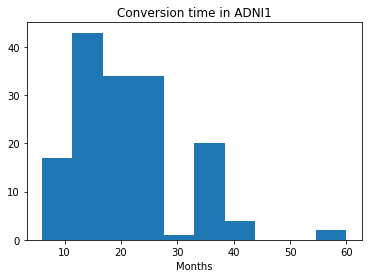

In [104]:
plt.hist(test_bl.dropna(subset=['Month_conv'])['Month_conv'].values)
plt.xlabel('Months')
plt.title('Conversion time in ADNI1')
plt.show()

In [181]:
len(test_bl)

248

In [183]:
len(test_bl.drop(test_bl[test_bl.Month_conv > 36].index))

242

In [184]:
test_bl.drop(test_bl[test_bl.Month_conv > 36].index, inplace=True)

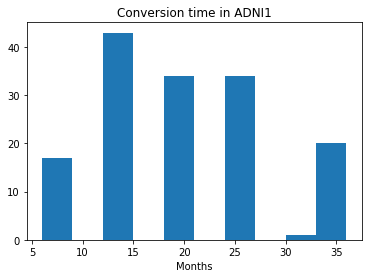

In [191]:
plt.hist(test_bl.dropna(subset=['Month_conv'])['Month_conv'].values)
plt.xlabel('Months')
plt.title('Conversion time in ADNI1')
plt.show()

In [185]:
test_bl.to_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni1_mci_bl_demog_weights.csv',
              index=False)

# ADNI2 

In [105]:
# number of subjects that passed QC in adni1
len(adni2.index.unique())

585

In [106]:
# number of MCI subjects that passed QC in adni1
len(adni2[(adni2['DX_bl'] == 'EMCI') | (adni2['DX_bl'] == 'LMCI')].index.unique())

314

In [107]:
# number of AD subjects that passed QC in adni1
len(adni2[adni2['DX_bl'] == 'AD'].index.unique())

89

In [108]:
# number of CN subjects that passed QC in adni1
len(adni2[adni2['DX_bl'] == 'CN'].index.unique())

117

In [109]:
# number of MCI subjects that convert
len(adni2[(adni2['conv_2_ad']==1) & ((adni2['DX_bl'] == 'EMCI') | (adni2['DX_bl'] == 'LMCI'))].index.unique())

64

In [110]:
# number of MCI subjects that are stable
len(adni2[(adni2['conv_2_ad']==0) & ((adni2['DX_bl'] == 'EMCI') | (adni2['DX_bl'] == 'LMCI'))].index.unique())

250

## filter out the stable MCI without enough follow-up

In [111]:
adni2_mci = adni2_longit[(adni2_longit['DX_bl'] == 'EMCI') | (adni2_longit['DX_bl'] == 'LMCI')]

In [113]:
todrop = []
for sub in adni2_mci[adni2_mci['conv_2_ad']==0].index.unique():
    fu = adni2_mci.loc[sub]
    try:
        vis = list(fu['Years_bl'])
    except:
        vis = [fu['Years_bl']]
    if any([x >= 2.7 for x in vis]):
        pass
    else:
        todrop.append(sub)

In [114]:
len(todrop)

101

## filter out the converter MCI who don't convert within 3 years 

In [115]:
drop_conv = []
for sub in adni2_mci[adni2_mci['conv_2_ad']==1].index.unique():
    tmp = adni2_mci.loc[sub]
    tmp.reset_index(inplace=True)
    for i,row in tmp.iterrows():
        ad_dx = row[tmp.columns.get_loc('AD')]
        vis = row[tmp.columns.get_loc('Years_bl')]
        if vis >= 2.7 and ad_dx == 0:
            drop_conv.append(sub)
            break
        else:
            pass

In [116]:
len(drop_conv)

13

In [117]:
adni2_mci_bl = adni2[(adni2['DX_bl'] == 'EMCI') | (adni2['DX_bl'] == 'LMCI')]

In [118]:
len(adni2_mci_bl)

314

In [119]:
adni2_mci_bl.reset_index(inplace=True)

In [120]:
# drop the MCI people listed in todrop from the adni_data
for i,row in adni2_mci_bl.iterrows():
    sub = row[adni2_mci_bl.columns.get_loc("RID")]
    if sub in todrop:
        adni2_mci_bl.drop(i,axis=0,inplace=True)

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
# drop the MCI people listed in todrop from the adni_data
for i,row in adni2_mci_bl.iterrows():
    sub = row[adni2_mci_bl.columns.get_loc("RID")]
    if sub in drop_conv:
        adni2_mci_bl.drop(i,axis=0,inplace=True)

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
len(adni2_mci_bl)

241

In [123]:
len(adni2_mci_bl[adni2_mci_bl['conv_2_ad']==1].index.unique())

56

In [124]:
len(adni2_mci_bl[adni2_mci_bl['conv_2_ad']==0].index.unique())

185

In [132]:
#adni2_mci_bl.to_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni2_mci_filter_model_weights.csv',
                    index=False)

In [129]:
adni2_mci.reset_index(inplace=True)

In [130]:
# get longitudinal data from filtered MCI subjects
adni2_conv = pd.merge(adni2_mci_bl[['RID']], adni2_mci[['RID','Month','conv_2_ad','DX','DX_bl']],
                      how='left', on='RID')

In [132]:
conv_dict = {}
for sid in adni2_conv.RID.unique():
    # compare baseline and final DX to determine point of conversion
    conv = adni2_conv[adni2_conv.RID == sid]['conv_2_ad']
    if sum(conv) != 0:
        tmp_df = adni2_conv[adni2_conv.RID == sid]
        bl_dx = adni2_conv[adni2_conv.RID == sid]['DX'].values[0]
        for i,row in tmp_df.iterrows():
            dx = row[tmp_df.columns.get_loc("DX")]
            month = row[tmp_df.columns.get_loc("Month")]
            if dx != bl_dx:
                #test[test.RID == sid]['Month_conv'] == month
                conv_dict.update({sid: month})
                break

In [134]:
for i,row in adni2_mci_bl.iterrows():
    sid = row['RID']
    conv = row['conv_2_ad']
    if conv == 1:
        try:
            adni2_mci_bl.ix[i, 'Month_conv'] = conv_dict[sid]
        except:
            pass

/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/AngelaTam/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

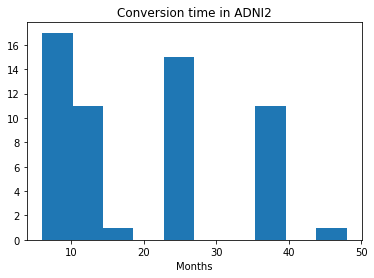

In [136]:
plt.hist(adni2_mci_bl.dropna(subset=['Month_conv'])['Month_conv'].values)
plt.xlabel('Months')
plt.title('Conversion time in ADNI2')
plt.show()

In [186]:
len(adni2_mci_bl)

241

In [188]:
len(adni2_mci_bl.drop(adni2_mci_bl[adni2_mci_bl.Month_conv > 36].index))

240

In [189]:
adni2_mci_bl.drop(adni2_mci_bl[adni2_mci_bl.Month_conv > 36].index, inplace=True)

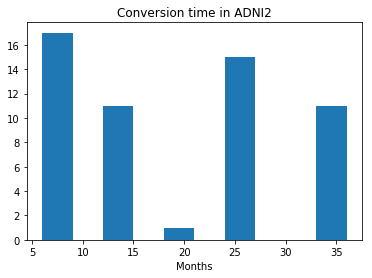

In [192]:
plt.hist(adni2_mci_bl.dropna(subset=['Month_conv'])['Month_conv'].values)
plt.xlabel('Months')
plt.title('Conversion time in ADNI2')
plt.show()

In [180]:
adni2_mci_bl.to_csv('/Users/AngelaTam/Desktop/adsf/adni1_vbm_adcn_subtypes_20171209/7clus/adni2_mci_bl_demog_weights.csv',
                   index=False)